# This notebook is to evaluate different networks

# Table of contents
## <a href='#Evaluation-2:-Evaluate-subnetwork-quality-by-comparing-to-the-whole-network'>2. Evaluate subnetwork by comparing to the whole network</a>
### <a href='#Evaluation-2.1:-does-the-scale-free-network-assumption-still-hold-in-the-subnetwork?'>2.1 Does scale-free assumption still hold in the subnetwork</a>
### <a href='#Evaluation-2.2:-compare-network-distance-by-GED-and-deltacon'>2.2 Compare distance between networks</a>
## <a href='#Evaluation-3:-compare-subnetworks-by-their-communities'>3. Compare subnetwork communities</a>
### <a href='#Evaluation-3.1:-compare-subnetwork-similarities'>3.1 Compare communities of the subnetwork</a>
### <a href='#Evaluation-3.2:-how-do-the-subnetwork-communities-compare-to-the-whole-network-in-terms-of-correlation-with-the-alcohol-phenotypes?'> 3.2 How do the communities compare between whole and subnetworks functionally?</a>

In [1]:
import sys
sys.path.append("../..")
import pandas as pd
from sys import platform 
from src.eda.eda_functions import *
from src.eda.subset_network import *
from src.eda.process_phenotype import *
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
%%time
prefix = 'G:' if platform == 'win32' else '/Volumes/GoogleDrive'
tom_df = pd.read_csv(prefix + '/Shared drives/NIAAA_ASSIST/Data/Kapoor_TOM.csv', index_col = 0)

Wall time: 4min 27s


# Evaluation 2: Evaluate subnetwork quality by comparing to the whole network

## Evaluation 2.1: does the scale-free network assumption still hold in the subnetwork?

### Docker Module Subselection

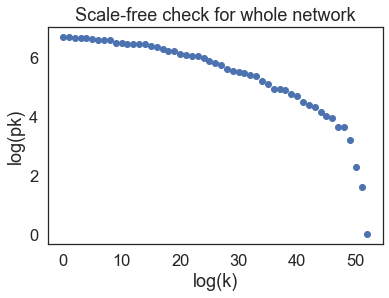

In [14]:
# Original network with no cutoff
scale_free_validate(tom_df, 'whole network')

In [4]:
## codes to generate cluster4_tom
# cluster4_tom = get_module_df(tom_df, 4)
# cluster4_tom.to_csv(prefix + '/Shared drives/NIAAA_ASSIST/Data/other data/cluster4_TOM.csv')

In [3]:
comm_df = pd.read_csv(prefix + '/Shared drives/NIAAA_ASSIST/Data/eda_derived/network_louvain_default.csv')

<font size=5>1/14 Updates:<font></br>
<font size=5>1. Now the get_subnetwork function will subset the DEG module (module 4) automatically so there is no need to import module4_tom anymore</br>
<font size=5>2. I combined the get_subnetwork1() and get_subnetwork2() to just get_subnetwork()</br>

Number of edges: 94166
Figure deg_mod=[4],non_deg_mod=[0],num_genes=100,min_weight=0.015 has been saved.


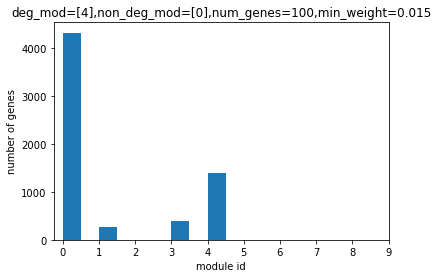

Number of edges: 82325
Figure deg_mod=[4],non_deg_mod=[1],num_genes=125,min_weight=0.01 has been saved.


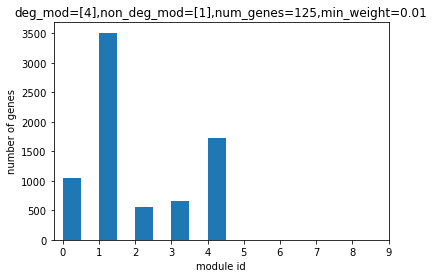

Number of edges: 74113
Figure deg_mod=[4],non_deg_mod=[2],num_genes=150,min_weight=0.01 has been saved.


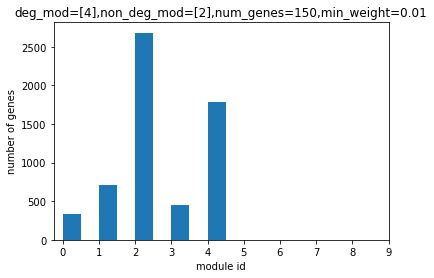

Number of edges: 89152
Figure deg_mod=[4],non_deg_mod=[3],num_genes=150,min_weight=0.02 has been saved.


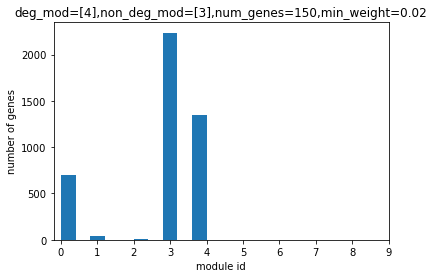

Number of edges: 82208
Figure deg_mod=[4],non_deg_mod=[],num_genes=250,min_weight=0.008 has been saved.


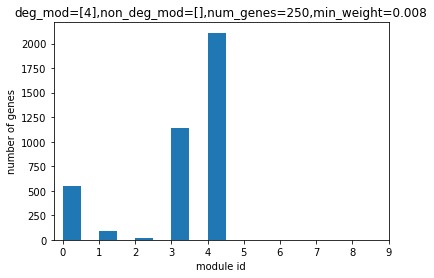

Wall time: 4min 8s


In [14]:
%%time
# New subselection method. This is the biggest change compared to the other notebook. The EDA methods are the same. Only the subselection method is changed. 
subnetwork_path = prefix +'/Shared drives/NIAAA_ASSIST/Data/eda_derived/subnetworks_Jan_14/'
G0_n_4, module0_n_4_df, subnetwork_name1 = get_subnetwork([4], 100, 0.015, tom_df, comm_df = comm_df, non_deg_modules = [0], plot_hist = True, 
                                         hist_dir = subnetwork_path, subnetwork_dir = subnetwork_path)
G1_n_4, module1_n_4_df, subnetwork_name2 = get_subnetwork([4], 125, 0.01, tom_df, comm_df = comm_df, non_deg_modules = [1], plot_hist = True, 
                                        hist_dir = subnetwork_path, subnetwork_dir = subnetwork_path)
G2_n_4, module2_n_4_df, subnetwork_name3 = get_subnetwork([4], 150, 0.01, tom_df, comm_df = comm_df, non_deg_modules = [2], plot_hist = True, 
                                        hist_dir = subnetwork_path, subnetwork_dir = subnetwork_path)
G3_n_4, module3_n_4_df, subnetwork_name4 = get_subnetwork([4], 150, 0.02, tom_df, comm_df = comm_df, non_deg_modules = [3], plot_hist = True, 
                                        hist_dir = subnetwork_path, subnetwork_dir = subnetwork_path)
G4, module4_df, subnetwork_name5 = get_subnetwork([4], 250, 0.008, tom_df, comm_df = comm_df, non_deg_modules = [], plot_hist = True, 
                                hist_dir = subnetwork_path, subnetwork_dir = subnetwork_path)

In [17]:
subnetwork_dfs = [module0_n_4_df, module1_n_4_df, module2_n_4_df, module3_n_4_df, module4_df]
subnetwork_names = [subnetwork_name1, subnetwork_name2, subnetwork_name3, subnetwork_name4, subnetwork_name5]

Removing existing folder: output
Created folder output


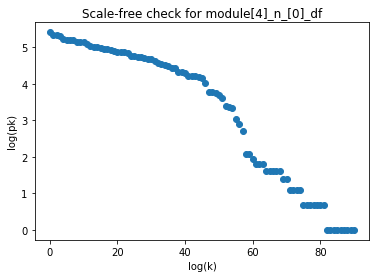

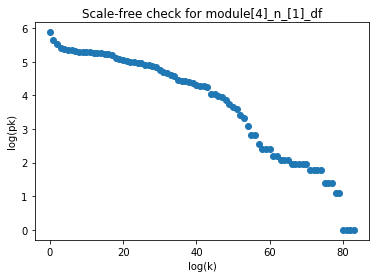

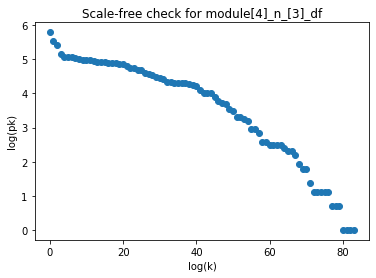

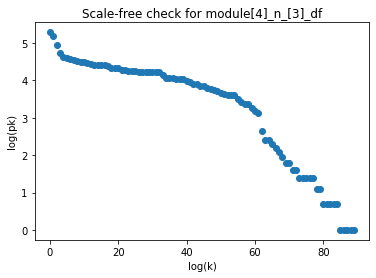

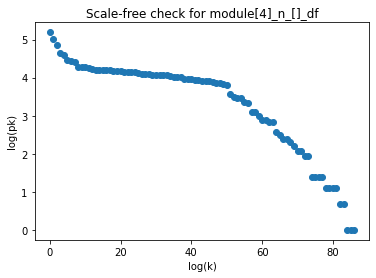

In [18]:
for i, subnetwork in enumerate(subnetwork_dfs):
    scale_free_validate(subnetwork, subnetwork_names[i])

## Evaluation 2.2: compare network distance by GED and deltacon

### Note to use DeltaCon, the graphs need to have the same number of nodes so use subnetwork without removing the nodes with degree = 0

### Docker Module Subselection

In [ ]:
%%time
subnetwork_complete_dfs = []
for subnetwork in subnetwork_dfs:
    subnetwork_complete_dfs.append(add_missing_genes(tom_df, subnetwork))

Wall time: 45min 12s


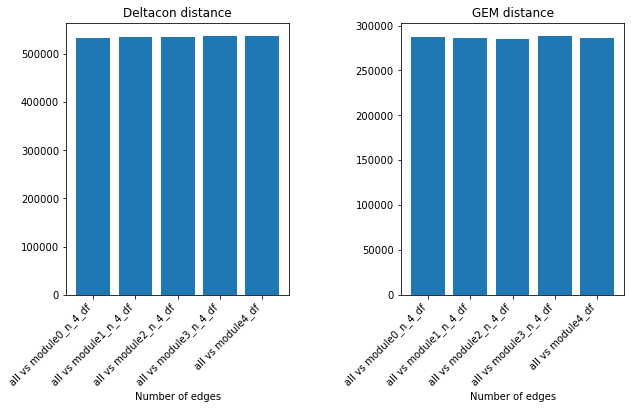

In [48]:
%%time
whole_and_subnetworks = [tom_df] + subnetwork_complete_dfs
plot_graph_distance(whole_and_subnetworks, ['all'] + subnetwork_names)

### Instead of subsetting the network again, I just added the missing genes back to the subnetwork df so the distance from the whole network can be compared

# Evaluation 3: compare subnetworks by their communities

### Docker Module Subselection

## Evaluation 3.1: compare subnetwork similarities

### Evaluation 3.1a: comparison by jaccard

In [20]:
%%time
# run louvain on subnetworks
subset_communities = []
for subset in subnetwork_dfs:
    subset_communities.append(run_louvain(subset, resolution = 0, n_aggregations = 0))

Wall time: 1.63 s


### Evaluation 3.1a: comparison by jaccard (nodes with degree = 0 excluded)

Wall time: 6.91 s


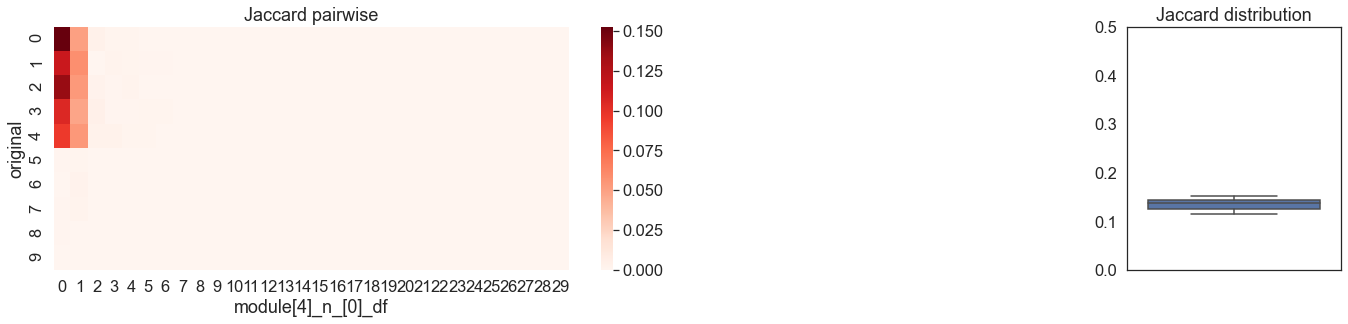

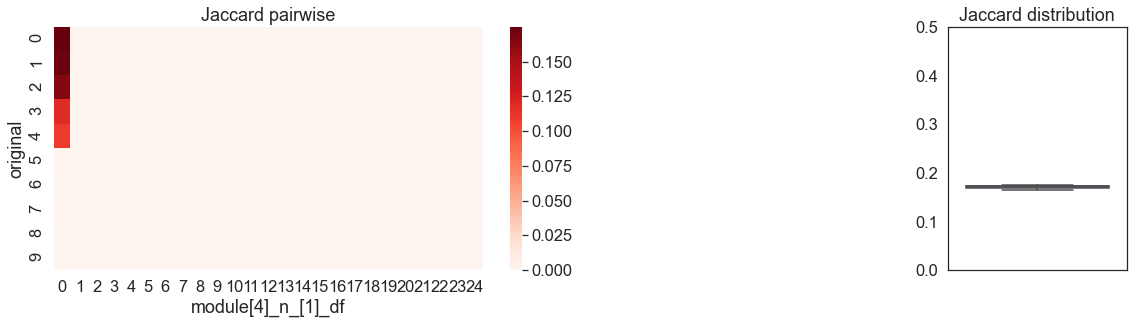

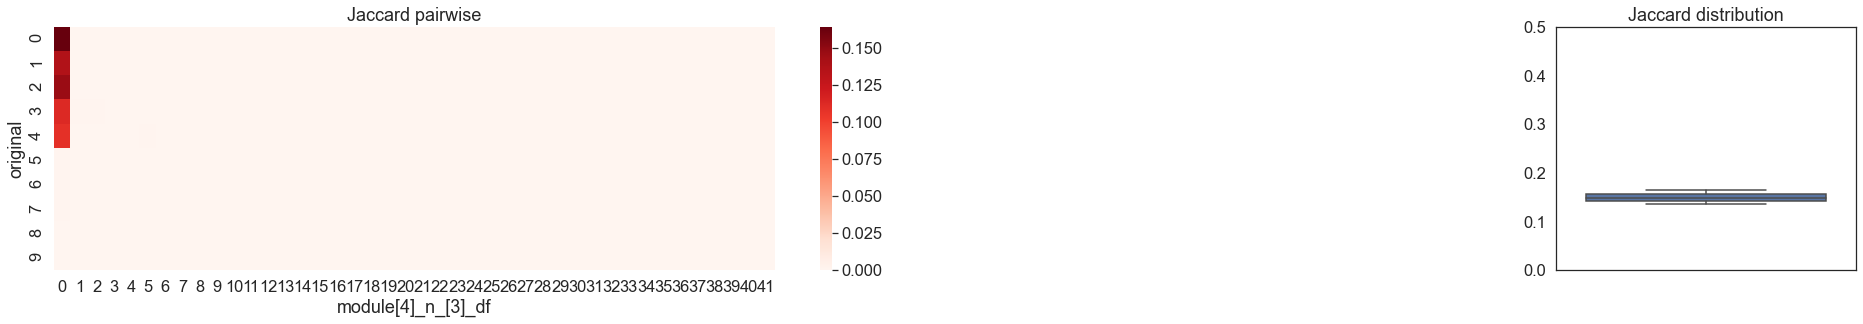

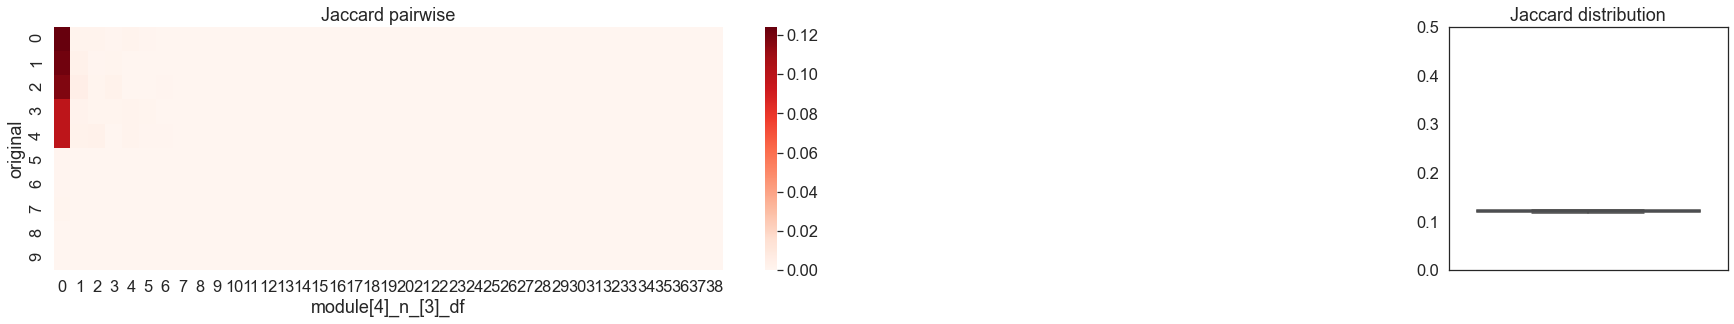

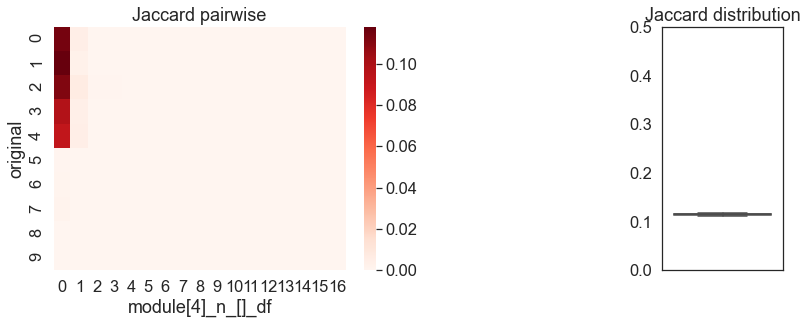

In [22]:
%%time
for i, subset_com in enumerate(subset_communities):
    cluster_jaccard(comm_df, subset_com, 'louvain_label', ['original', subnetwork_names[i]], cutout_nodes = True, top=3, y_max = 0.5)

### Evaluation 3.1c: comparison of subnetwork by normalized mutual information

### Docker Module Subselection

In [ ]:
cluster1_name, cluster1, cluster_list, cluster_column, comparison_names

Wall time: 185 ms


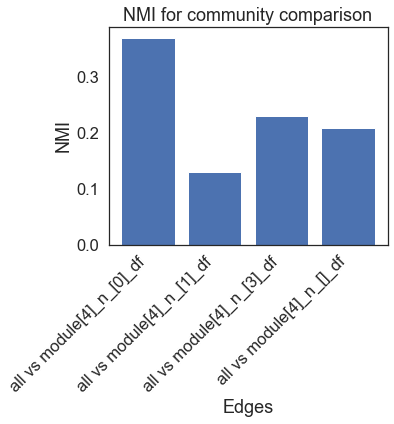

In [24]:
%%time
comparison_names = ['all vs ' + name for name in subnetwork_names]
plot_cluster_nmi_comparison('all', comm_df, subset_communities, 
                            'louvain_label', comparison_names)

## Evaluation 3.2: how do the subnetwork communities compare to the whole network in terms of correlation with the alcohol phenotypes?

### Evaluation 3.2a: compare whole network and subnetwork communities by % DE in each community

### Docker Module Subselection

Wall time: 3.21 s


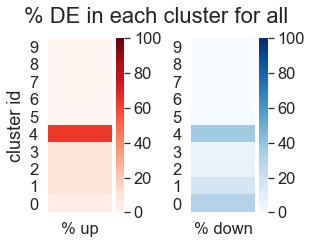

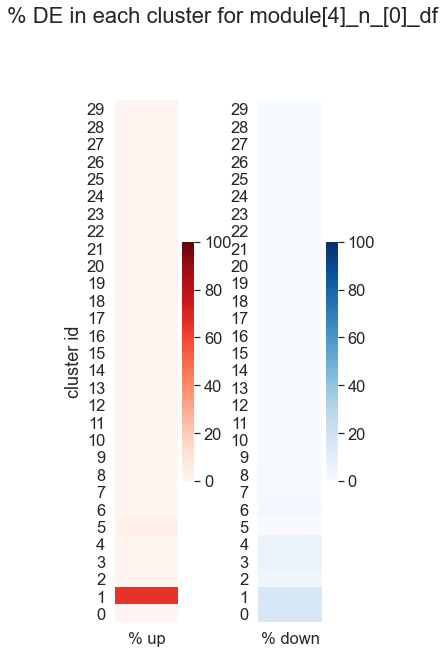

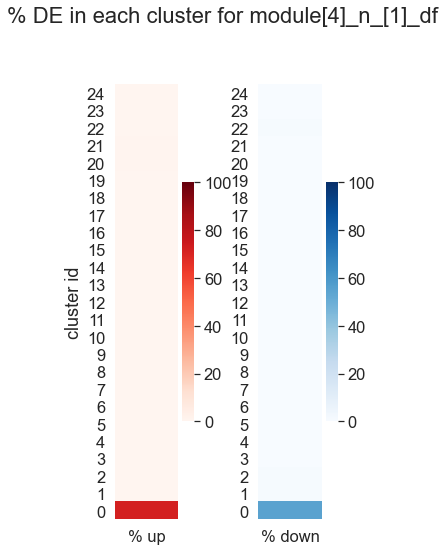

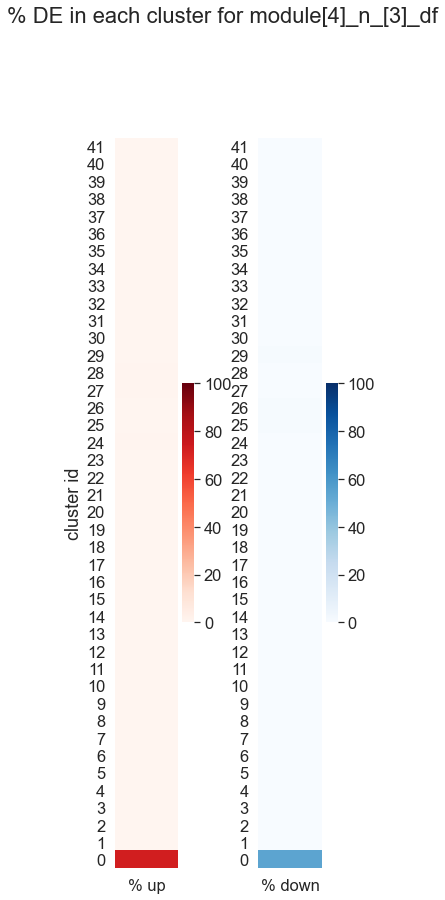

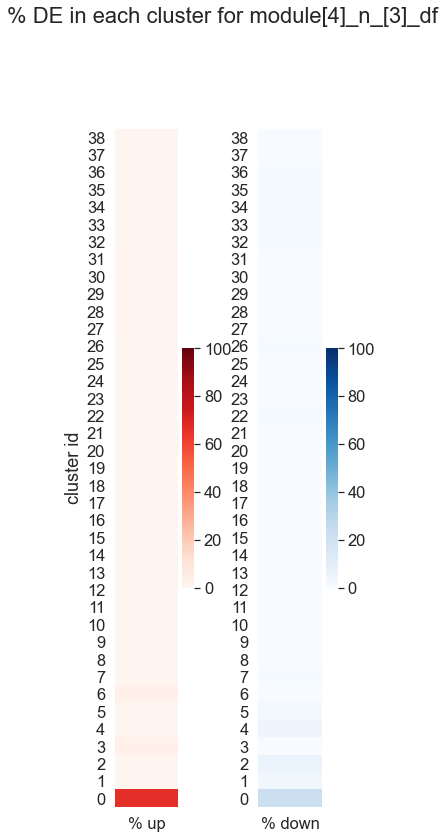

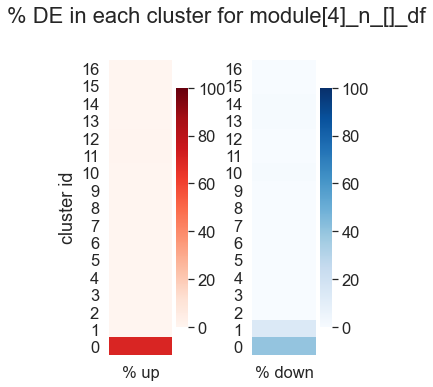

In [28]:
%%time
all_network_names = ['all'] + subnetwork_names
all_communities = [comm_df] + subset_communities
for i, cluster_df in enumerate(all_communities):
    cluster_DE_perc(cluster_df, 'louvain_label', all_network_names[i])

### Evaluation 3.2b: compare whole network and subnetwork communities by % significant genes in each cluster

### Docker Module Subselection

In [31]:
expression_meta_df = pd.read_csv(prefix + '/Shared drives/NIAAA_ASSIST/Data/eda_derived/expression_meta.csv', low_memory = False)

Wall time: 16min 50s


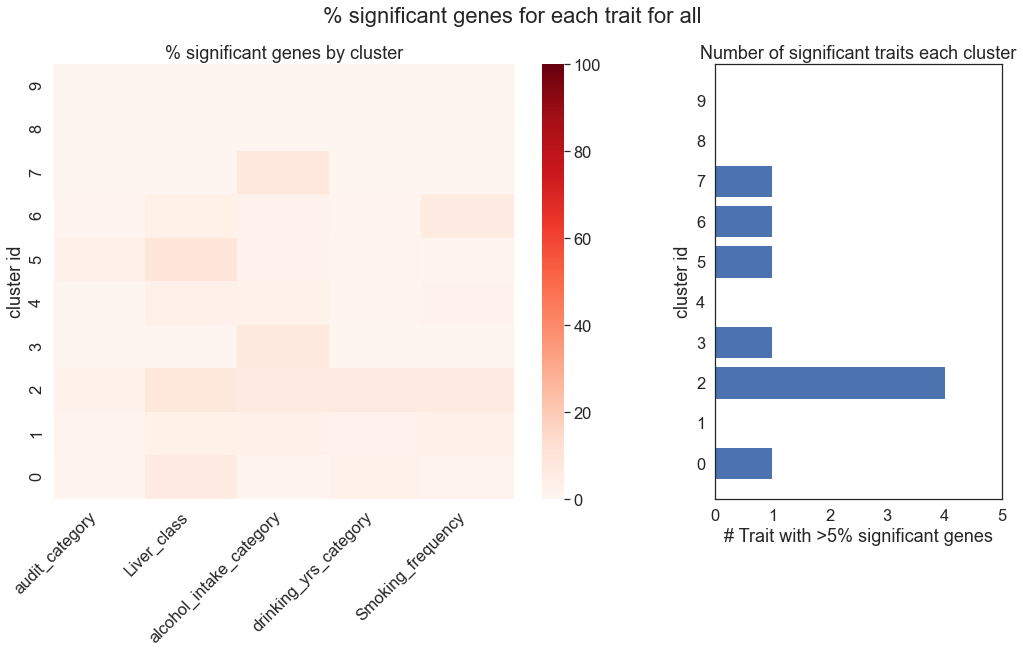

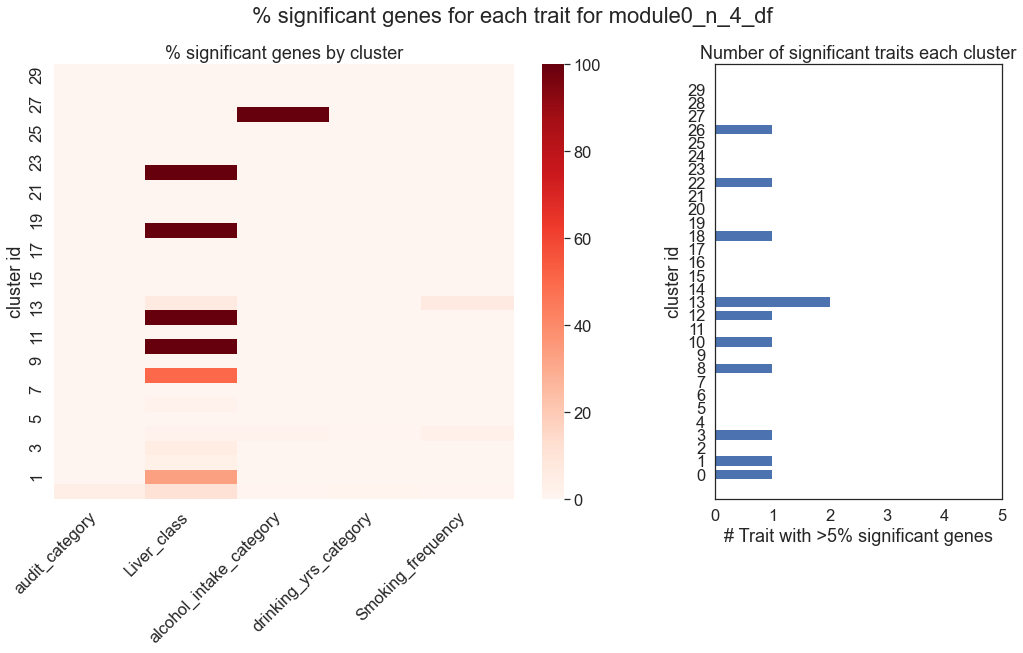

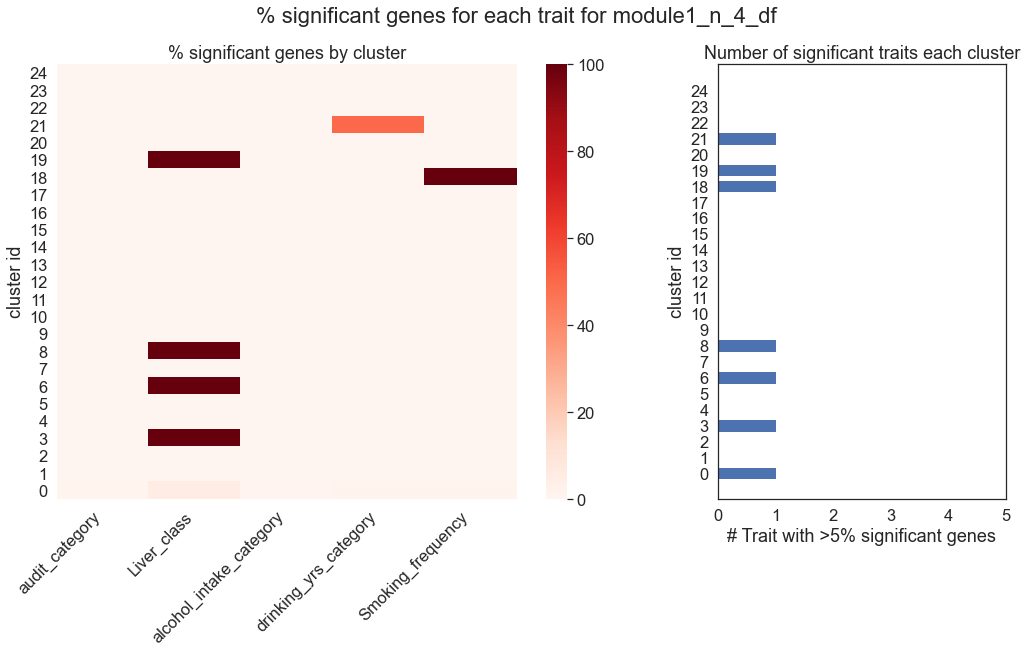

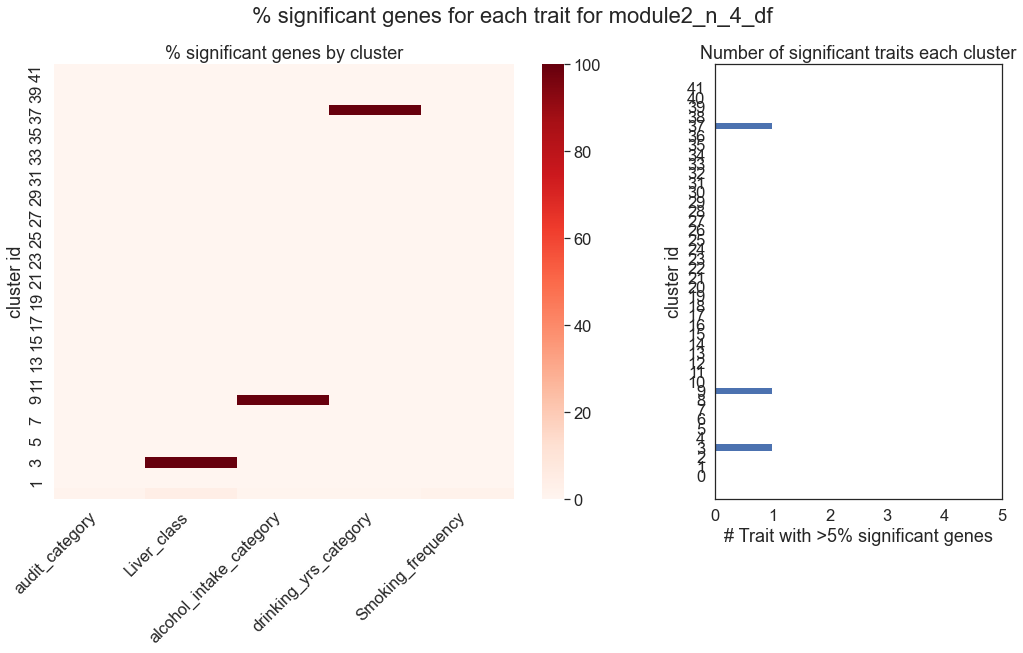

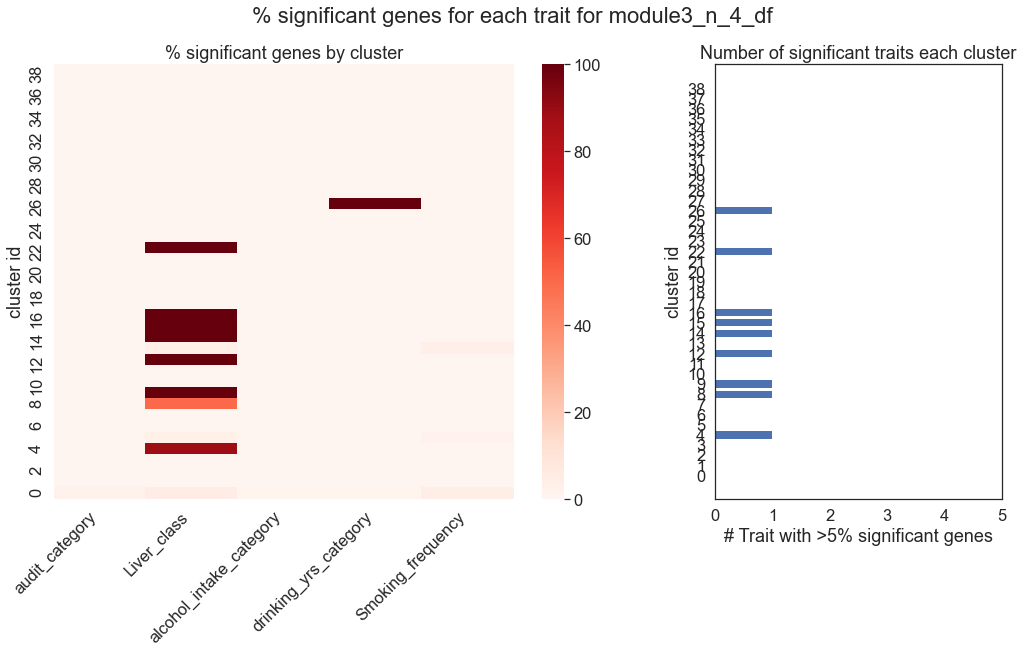

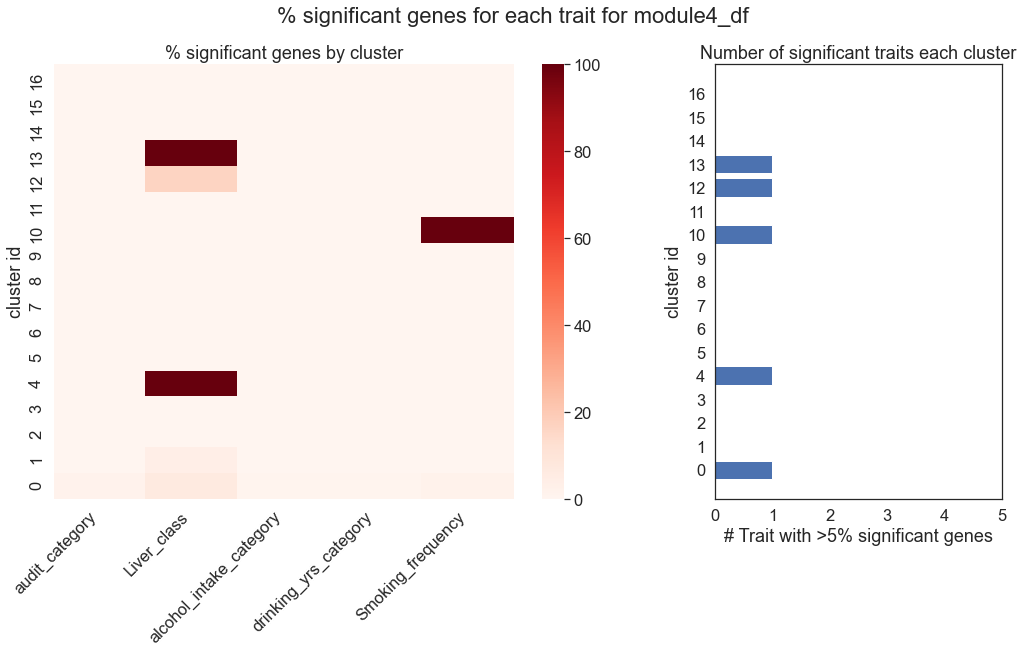

In [137]:
%%time
for i, cluster_df in enumerate(all_communities):
    plot_sig_perc(cluster_df, 'louvain_label', all_network_names[i], expression_meta_df)

### Evaluation 3.2c: compare whole network and subnetwork communities by cluster and trait correlation

### Docker Module Subselection

Wall time: 16.4 s


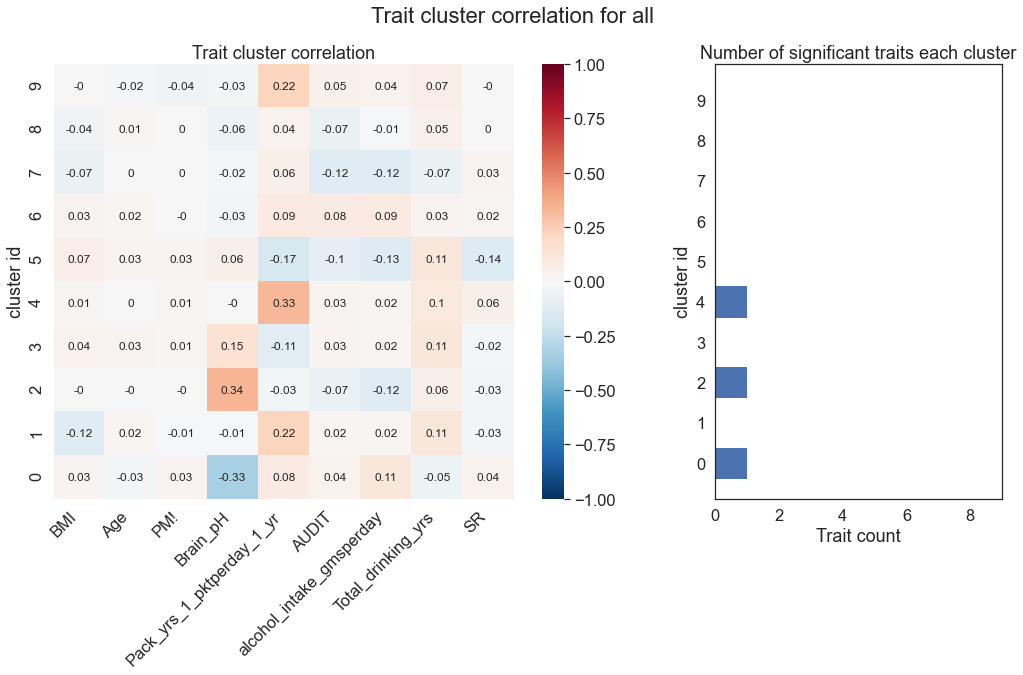

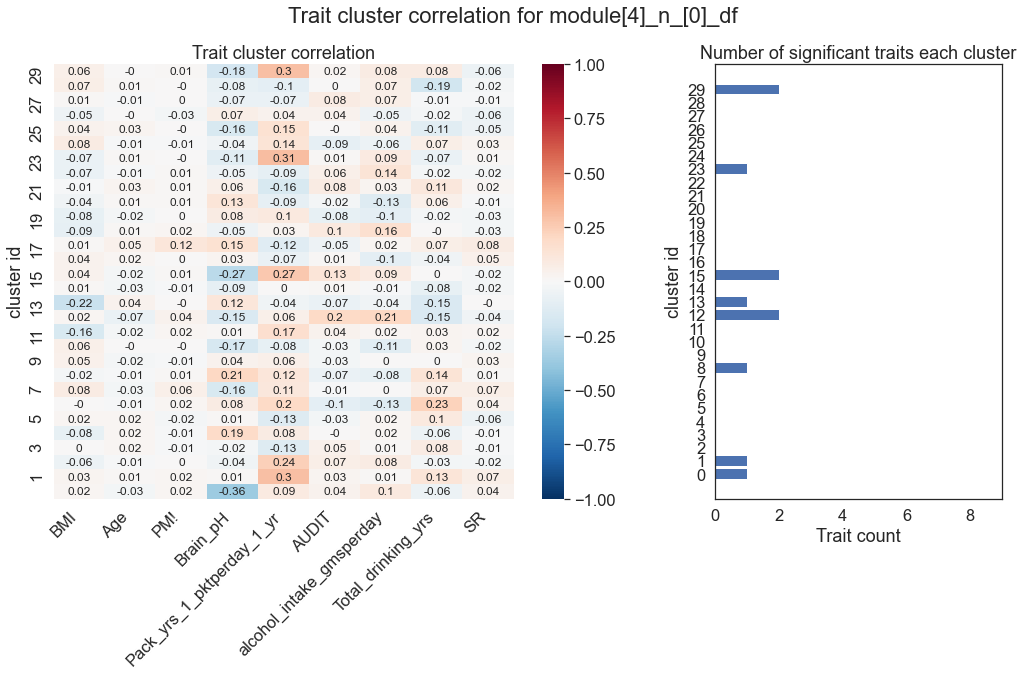

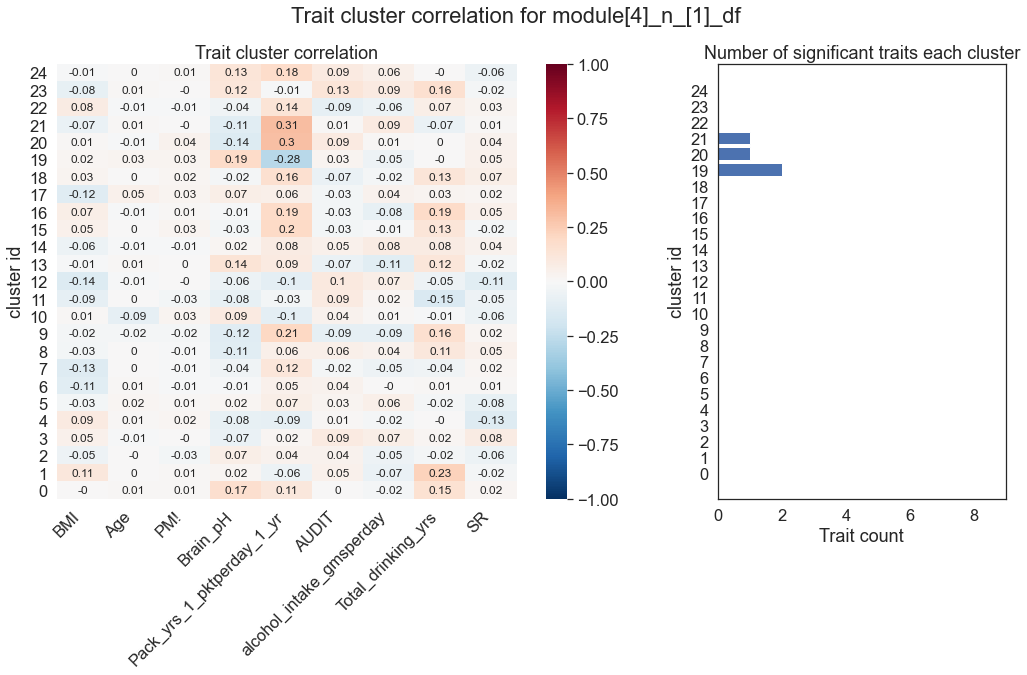

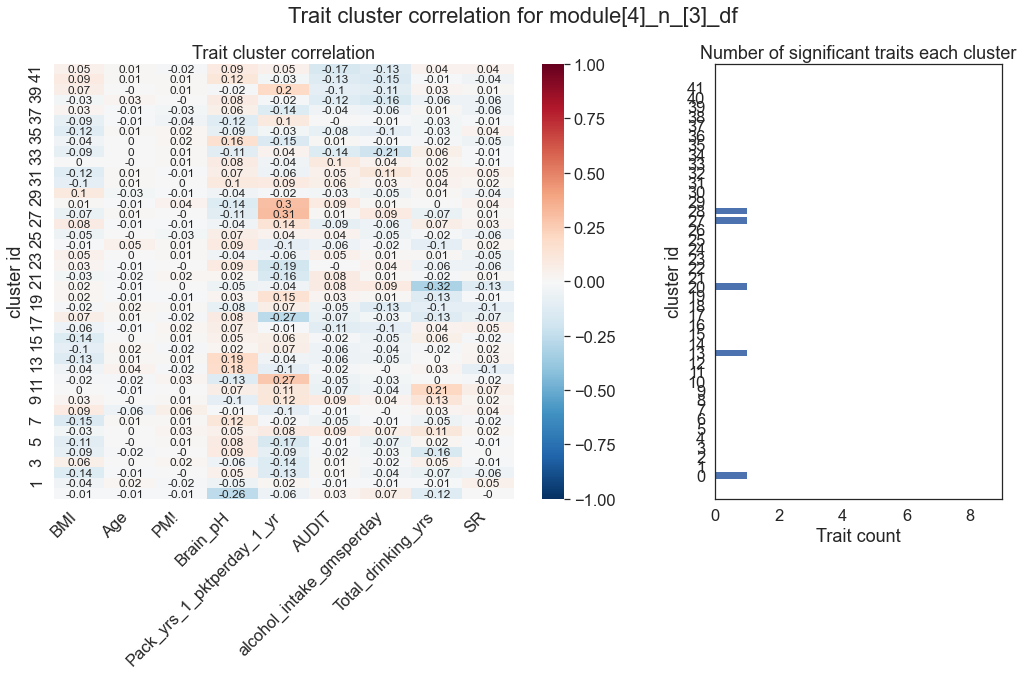

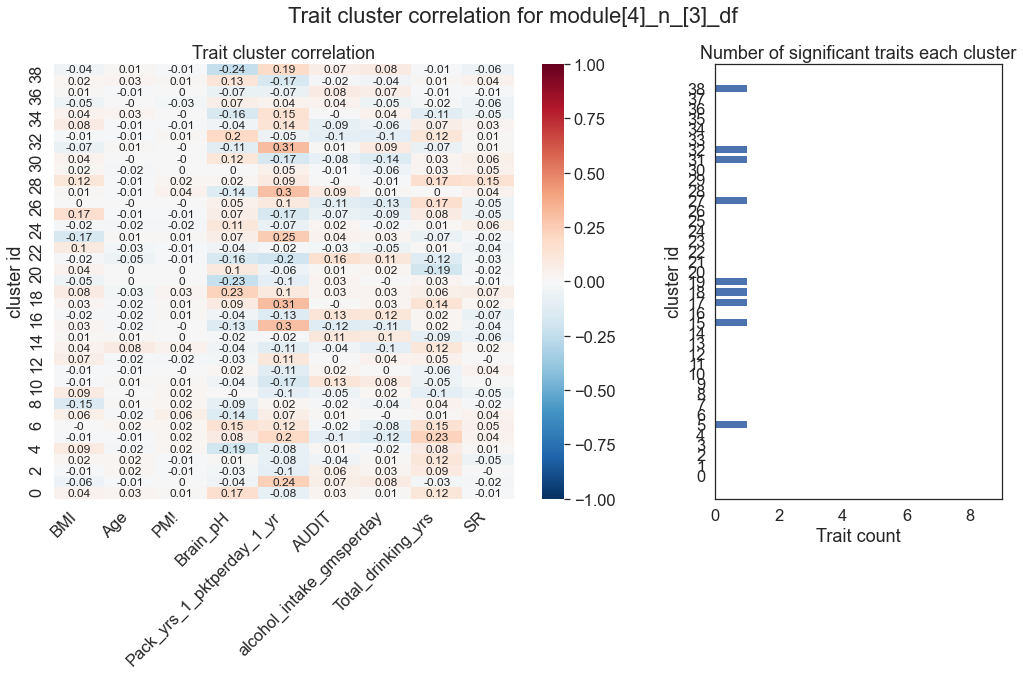

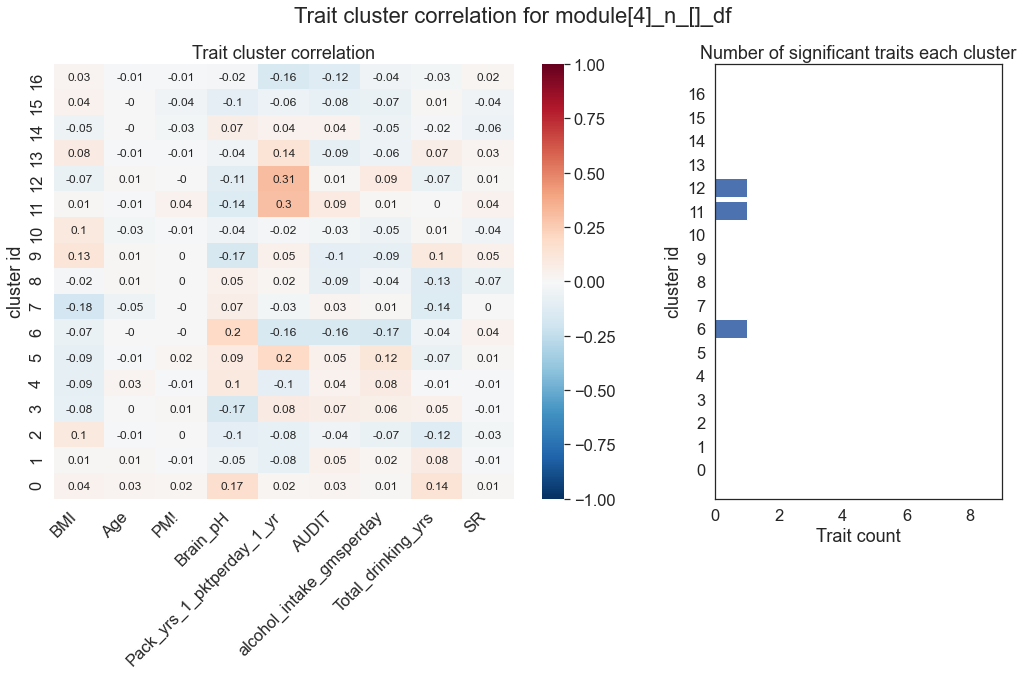

In [32]:
%%time
for i, cluster_df in enumerate(all_communities):
    cluster_phenotype_corr(cluster_df, 'louvain_label', all_network_names[i], expression_meta_df)